In [1]:
pip install tensorflow opencv-python numpy matplotlib

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3224 - accuracy: 0.9099
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1241 - accuracy: 0.9623
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0833 - accuracy: 0.9740
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


313/313 [==============================] - 0s 928us/step - loss: 0.0970 - accuracy: 0.9695
0.096952885389328
0.9695000052452087
1/1 [==============================] - 0s 43ms/step
This digit is probably a 1


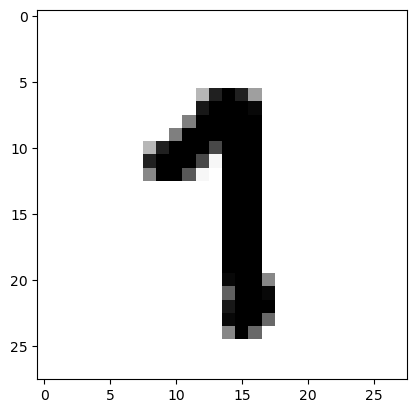

1/1 [==============================] - 0s 16ms/step
This digit is probably a 2


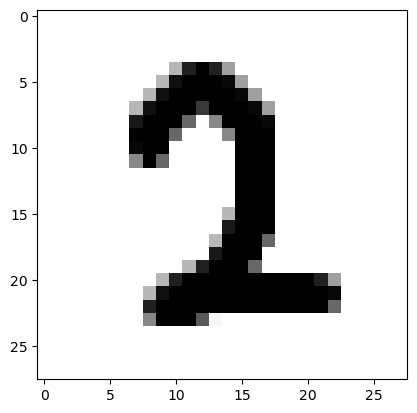

1/1 [==============================] - 0s 14ms/step
This digit is probably a 3


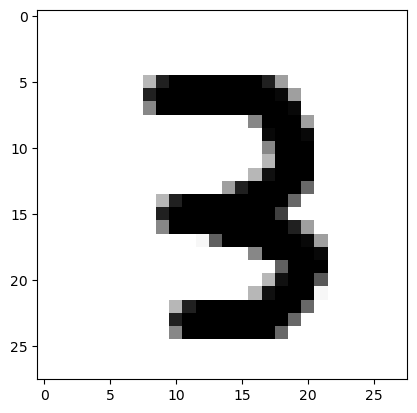

In [6]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)  # normalizing data, remember there's standardization and normalization

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu')) #see tensorflow flaschard
model.add(tf.keras.layers.Dense(128, activation='relu')) #see tensorflow flascha
model.add(tf.keras.layers.Dense(128, activation='softmax')) #see tensorflow flashcard

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

model.save('handwritten.model')

model = tf.keras.models.load_model('handwritten.model')

loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

        
image_number = 1

# Use raw string for the file path
while os.path.isfile(f"C:\\Users\\ACER\\Documents\\Digits\\digit{image_number}.png"):
    try:
        img_path = f"C:\\Users\\ACER\\Documents\\Digits\\digit{image_number}.png"
        img = cv2.imread(img_path)[:,:,0]  # Ensure the correct path is used here
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1
